In [28]:
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from sklearn.ensemble import IsolationForest

In [2]:
file_path = Path("data\cleaned_mortality_data.csv")
cleaned_df = pd.read_csv(file_path)
cleaned_df

,state,year,deaths,population,crude_rate,crude_rate_lower_95%_confidence_interval,crude_rate_upper_95%_confidence_interval,prescriptions_dispensed_by_us_retailers_in_that_year_(millions)
0,Alabama,1999,39.0,4430141,0.9,0.6,1.2,116
1,Alabama,2000,46.0,4447100,1.0,0.8,1.4,126
2,Alabama,2001,67.0,4467634,1.5,1.2,1.9,138
3,Alabama,2002,75.0,4480089,1.7,1.3,2.1,142
4,Alabama,2003,54.0,4503491,1.2,0.9,1.6,149
...,...,...,...,...,...,...,...,...
811,Wyoming,2010,49.0,563626,8.7,6.4,11.5,210
812,Wyoming,2011,47.0,568158,8.3,6.1,11.0,219
813,Wyoming,2012,47.0,576412,8.2,6.0,10.8,217
814,Wyoming,2013,52.0,582658,8.9,6.7,11.7,207


In [3]:
# K-Means clustering (Select relevant features for clustering)
features = cleaned_df[["deaths", "population", "crude_rate", "prescriptions_dispensed_by_us_retailers_in_that_year_(millions)"]]

In [4]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [5]:
# Determine the optimal k using elbow method
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

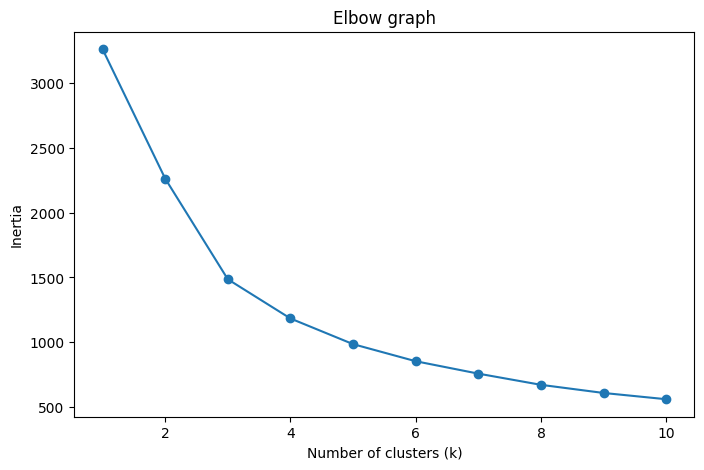

In [6]:
# Plot the elbow graph
plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow graph")
plt.show()

In [7]:
# Apply K-Means with optimal k (4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
cleaned_df["cluster"] = kmeans.fit_predict(scaled_features)
model = cleaned_df["cluster"]
model

0      0
1      0
2      0
3      0
4      0
      ..
811    1
812    1
813    1
814    1
815    1
Name: cluster, Length: 816, dtype: int32

In [8]:
# Apply K-means grouped by year
clustered_data = []
for year, group in cleaned_df.groupby("year"):
    features = group[["deaths", "population", "crude_rate", "prescriptions_dispensed_by_us_retailers_in_that_year_(millions)"]]

In [9]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [10]:
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

In [11]:
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
group["cluster"] = kmeans.fit_predict(scaled_features)
clustered_data.append(group)

In [12]:
clustered_df = pd.concat(clustered_data)
clustered_df

,state,year,deaths,population,crude_rate,crude_rate_lower_95%_confidence_interval,crude_rate_upper_95%_confidence_interval,prescriptions_dispensed_by_us_retailers_in_that_year_(millions),cluster
15,Alabama,2014,282.0,4849377,5.8,5.1,6.5,196,0
31,Alaska,2014,79.0,736732,10.7,8.5,13.4,196,0
47,Arizona,2014,616.0,6731484,9.2,8.4,9.9,196,2
63,Arkansas,2014,179.0,2966369,6.0,5.2,6.9,196,0
79,California,2014,2159.0,38802500,5.6,5.3,5.8,196,1
95,Colorado,2014,532.0,5355866,9.9,9.1,10.8,196,2
111,Connecticut,2014,531.0,3596677,14.8,13.5,16.0,196,2
127,Delaware,2014,125.0,935614,13.4,11.0,15.7,196,0
143,District of Columbia,2014,65.0,658893,9.9,7.6,12.6,196,0
159,Florida,2014,1446.0,19893297,7.3,6.9,7.6,196,1


In [13]:
clustered_data = []
for state, group in cleaned_df.groupby("state"):
    features = group[["deaths", "population", "crude_rate", "prescriptions_dispensed_by_us_retailers_in_that_year_(millions)"]]

In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [15]:
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

In [16]:
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
group["cluster"] = kmeans.fit_predict(scaled_features)
clustered_data.append(group)

In [17]:
state_clustered_df = pd.concat(clustered_data)
state_clustered_df

,state,year,deaths,population,crude_rate,crude_rate_lower_95%_confidence_interval,crude_rate_upper_95%_confidence_interval,prescriptions_dispensed_by_us_retailers_in_that_year_(millions),cluster
800,Wyoming,1999,228.0,491780,5.9,4.9,6.5,116,0
801,Wyoming,2000,10.0,493782,5.9,1.0,3.7,126,3
802,Wyoming,2001,228.0,494657,5.9,4.9,6.5,138,0
803,Wyoming,2002,17.0,500017,5.9,2.0,5.4,142,3
804,Wyoming,2003,228.0,503453,5.9,4.9,6.5,149,0
805,Wyoming,2004,14.0,509106,5.9,1.5,4.6,155,3
806,Wyoming,2005,10.0,514157,5.9,0.9,3.6,163,3
807,Wyoming,2006,14.0,522667,5.9,1.5,4.5,174,1
808,Wyoming,2007,25.0,534876,4.7,3.0,6.9,184,1
809,Wyoming,2008,48.0,546043,8.8,6.5,11.7,196,2


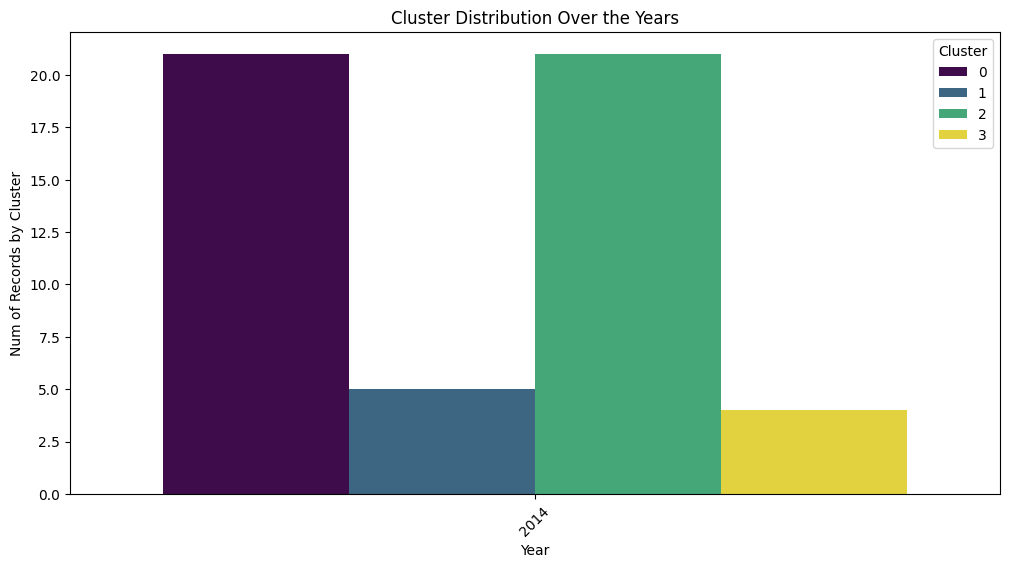

In [18]:
# Create bar chart for yearly clustering
plt.figure(figsize=(12,6))
sns.countplot(data=clustered_df, x="year", hue="cluster", palette="viridis")
plt.xlabel("Year")
plt.ylabel("Num of Records by Cluster")
plt.title("Cluster Distribution Over the Years")
plt.legend(title="Cluster")
plt.xticks(rotation=45)
plt.show()

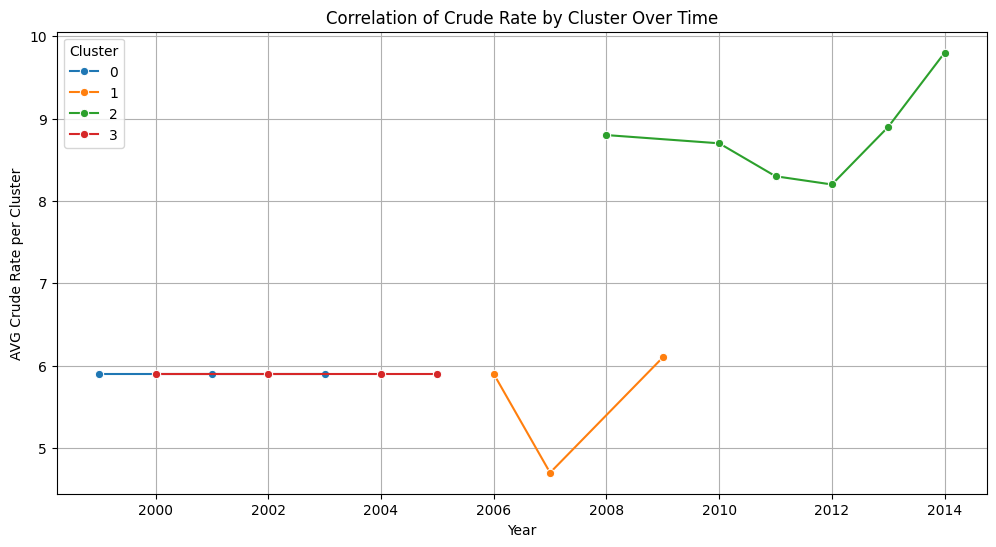

In [19]:
# Create bar chart for state-wise clustering
plt.figure(figsize=(12,6))
sns.lineplot(data=state_clustered_df.groupby(["year", "cluster"])["crude_rate"].mean().reset_index(), x="year", y="crude_rate", hue="cluster", palette="tab10", marker="o")
plt.xlabel("Year")
plt.ylabel("AVG Crude Rate per Cluster")
plt.title("Correlation of Crude Rate by Cluster Over Time")
plt.legend(title = "Cluster")
plt.grid()
plt.show()

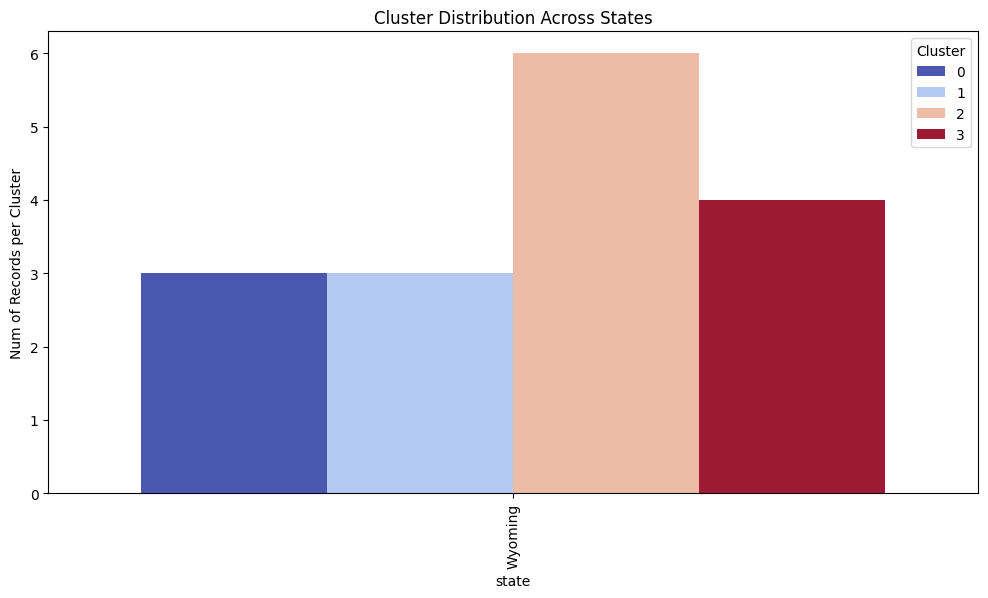

In [20]:
# Create a bar chart of state-wise clustering
plt.figure(figsize=(12,6))
sns.countplot(data=state_clustered_df, x="state", hue="cluster", palette="coolwarm")
plt.xlabel("state")
plt.ylabel("Num of Records per Cluster")
plt.title("Cluster Distribution Across States")
plt.legend(title = "Cluster")
plt.xticks(rotation=90)
plt.show()

In [29]:
features = ["deaths", "population", "crude_rate"]
cleaned_filtered_df = cleaned_df[features].dropna()

model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
cleaned_filtered_df["anomoly_score"] = model.fit_predict(cleaned_filtered_df)

cleaned_filtered_df["is_anomoly"] = np.where(cleaned_filtered_df["anomoly_score"] == -1, "Anomoly", "Normal")

cleaned_df = cleaned_df.merge(cleaned_filtered_df[["deaths", "population", "crude_rate", "is_anomoly"]], on=["deaths", "population", "crude_rate"], how="left")

print(cleaned_df["is_anomoly"].value_counts())

is_anomoly
Normal     775
Anomoly     41
Name: count, dtype: int64


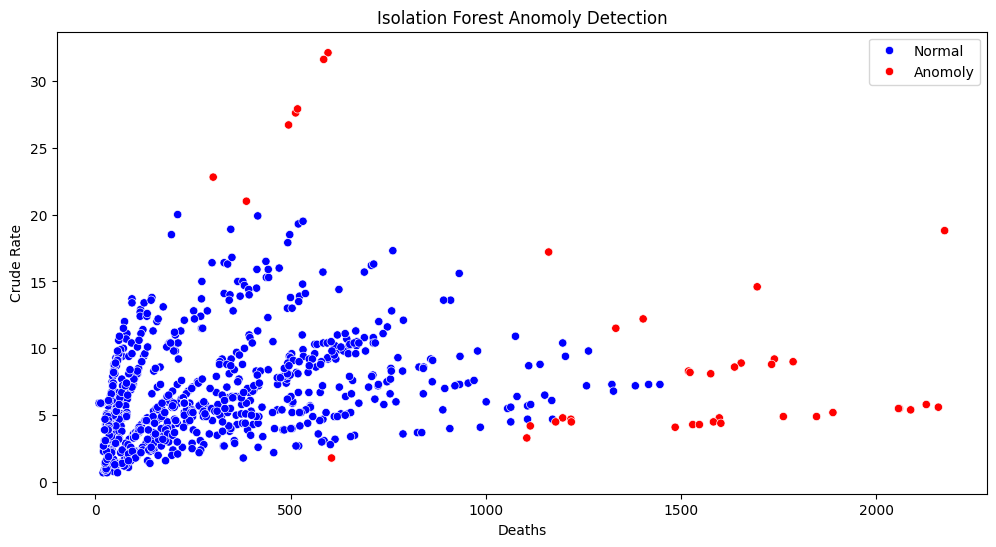

In [30]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=cleaned_df, x="deaths", y="crude_rate", hue="is_anomoly", palette={"Normal": "blue", "Anomoly": "red"})
plt.title("Isolation Forest Anomoly Detection")
plt.xlabel("Deaths")
plt.ylabel("Crude Rate")
plt.legend()
plt.show()

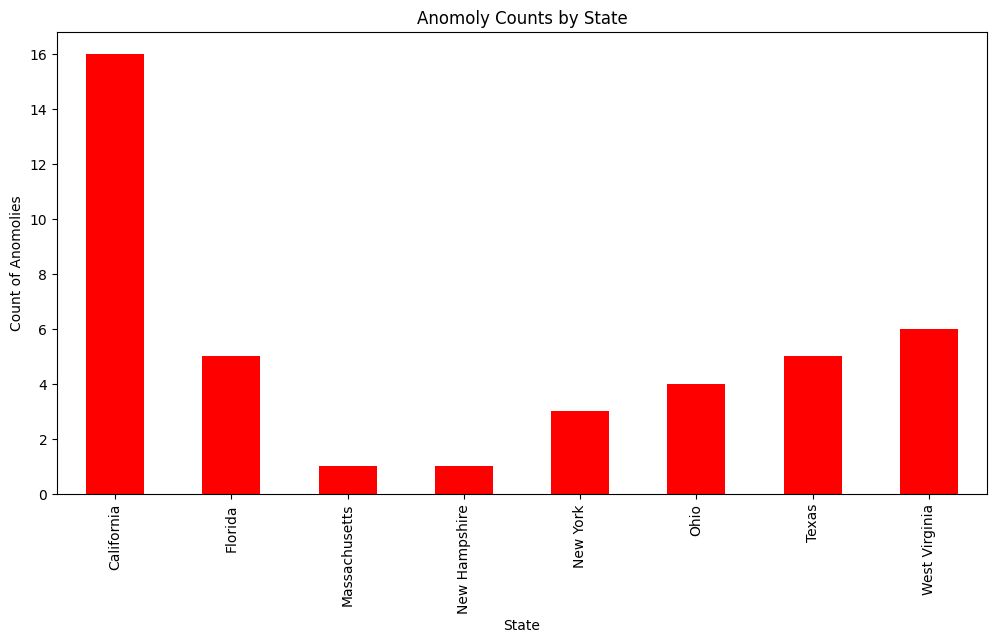

In [31]:
state_anomolies = cleaned_df[cleaned_df["is_anomoly"] == "Anomoly"].groupby("state").size()
state_anomolies.plot(kind="bar", figsize=(12,6), color="red")
plt.title("Anomoly Counts by State")
plt.ylabel("Count of Anomolies")
plt.xlabel("State")
plt.show()